# 第十章 数据表达与特征工程

## 10.1

In [1]:
import pandas as pd
fruits = pd.DataFrame({'数值特征': [5, 6, 7, 8, 9],
                      '类型特征': ['西瓜', '香蕉', '橘子', '苹果' ,'葡萄']})
display(fruits)

,数值特征,类型特征
0,5,西瓜
1,6,香蕉
2,7,橘子
3,8,苹果
4,9,葡萄


In [2]:
fruits_dum = pd.get_dummies(fruits)
display(fruits_dum)

,数值特征,类型特征_橘子,类型特征_苹果,类型特征_葡萄,类型特征_西瓜,类型特征_香蕉
0,5,0,0,0,1,0
1,6,0,0,0,0,1
2,7,1,0,0,0,0
3,8,0,1,0,0,0
4,9,0,0,1,0,0


In [3]:
fruits['数值特征'] = fruits['数值特征'].astype(str)
pd.get_dummies(fruits, columns=['数值特征'])

,类型特征,数值特征_5,数值特征_6,数值特征_7,数值特征_8,数值特征_9
0,西瓜,1,0,0,0,0
1,香蕉,0,1,0,0,0
2,橘子,0,0,1,0,0
3,苹果,0,0,0,1,0
4,葡萄,0,0,0,0,1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random.RandomState(38)
x = rnd.uniform(-5, 5, size = 50)
y_no_noise = (np.cos(6*x)+x)
X = x.reshape(-1, 1)
y = (y_no_noise + rnd.normal(size = len(x)))/2
plt.plot(X, y, 'o', c='r')
plt.show()

<Figure size 640x480 with 1 Axes>

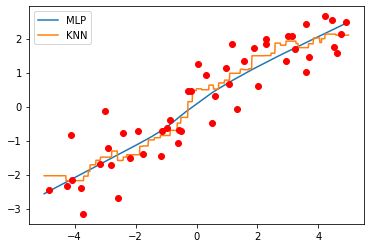

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
line = np.linspace(-5, 5, 1000, endpoint=False).reshape(-1, 1)
mlpr = MLPRegressor().fit(X, y)
knr = KNeighborsRegressor().fit(X ,y)
plt.plot(line, mlpr.predict(line), label = 'MLP')
plt.plot(line, knr.predict(line), label = 'KNN')
plt.plot(X, y, 'o', c='r')
plt.legend(loc = 'best')
plt.show()

In [6]:
bins = np.linspace(-5,5,11)
target_bin = np.digitize(X, bins=bins)
print('装箱数据范围：\n{}'.format(bins))
print('\n前十个数据点的特征值：\n{}'.format(X[:10]))
print('\n前十个数据点所在的箱子：\n{}'.format(target_bin[:10]))

装箱数据范围：
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]

前十个数据点的特征值：
[[-1.1522688 ]
 [ 3.59707847]
 [ 4.44199636]
 [ 2.02824894]
 [ 1.33634097]
 [ 1.05961282]
 [-2.99873157]
 [-1.12612112]
 [-2.41016836]
 [-4.25392719]]

前十个数据点所在的箱子：
[[ 4]
 [ 9]
 [10]
 [ 8]
 [ 7]
 [ 7]
 [ 3]
 [ 4]
 [ 3]
 [ 1]]


In [7]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)
onehot.fit(target_bin)
X_in_bin = onehot.transform(target_bin)
print('装箱后的数据形态：{}'.format(X_in_bin.shape))
print('\n装箱后的前十个数据点：\n{}'.format(X_in_bin[:10]))

装箱后的数据形态：(50, 10)

装箱后的前十个数据点：
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


E:\Anaconda\Anaconda3\envs\env_2\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


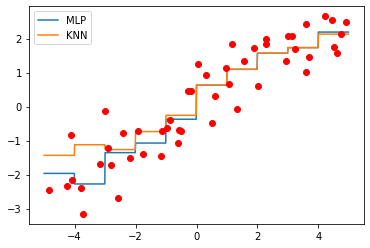

In [8]:
new_line = onehot.transform(np.digitize(line, bins = bins))
new_mlpr = MLPRegressor().fit(X_in_bin, y)
new_knr = KNeighborsRegressor().fit(X_in_bin, y)
plt.plot(line, new_mlpr.predict(new_line), label = 'MLP')
plt.plot(line, new_knr.predict(new_line), label = 'KNN')
plt.plot(X, y, 'o', c='r')
plt.legend(loc = 'best')
plt.show()

In [9]:
array_1 = [1, 2, 3, 4, 5]
array_2 = [6, 7, 8, 9, 0]
array_3 = np.hstack((array_1, array_2))
print('将数组2添加到数据1中后得到：{}'.format(array_3))

将数组2添加到数据1中后得到：[1 2 3 4 5 6 7 8 9 0]


In [10]:
X_stack = np.hstack([X, X_in_bin])
print(X_stack.shape)

(50, 11)


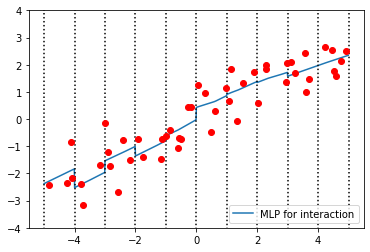

In [11]:
line_stack = np.hstack([line, new_line])
mlpr_interact = MLPRegressor().fit(X_stack, y)
plt.plot(line, mlpr_interact.predict(line_stack), 
         label='MLP for interaction')
plt.ylim(-4,4)
for vline in bins:
    plt.plot([vline,vline],[-5,5],':',c='k')
plt.legend(loc='lower right')
plt.plot(X, y,'o',c='r')
plt.show()

In [12]:
X_multi = np.hstack([X_in_bin, X*X_in_bin])
print(X_multi.shape)
print(X_multi[0])

(50, 20)
[ 0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        -0.        -0.
 -0.        -1.1522688 -0.        -0.        -0.        -0.
 -0.        -0.       ]


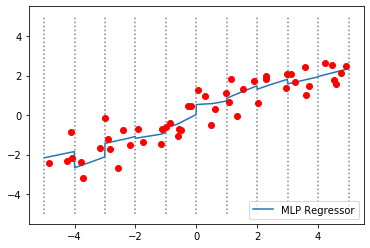

In [13]:
mlpr_multi = MLPRegressor().fit(X_multi, y)
line_multi = np.hstack([new_line, line * new_line])
plt.plot(line, mlpr_multi.predict(line_multi), label = 'MLP Regressor')
for vline in bins:
    plt.plot([vline,vline],[-5,5],':',c='gray')
plt.plot(X, y, 'o', c='r')
plt.legend(loc='lower right')
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=20, include_bias= False)
X_poly = poly.fit_transform(X)
print(X_poly.shape)

(50, 20)


In [15]:
print('原始数据集中的第一个样本特征：\n{}'.format(X[0]))
print('\n处理后的数据集中第一个样本特征：\n{}'.format(X_poly[0]))

原始数据集中的第一个样本特征：
[-1.1522688]

处理后的数据集中第一个样本特征：
[ -1.1522688    1.3277234   -1.52989425   1.76284942  -2.0312764
   2.34057643  -2.6969732    3.10763809  -3.58083443   4.1260838
  -4.75435765   5.47829801  -6.3124719    7.27366446  -8.38121665
   9.65741449 -11.12793745  12.82237519 -14.77482293  17.02456756]


In [16]:
print ('PolynomialFeatures对原始数据的处理:\n{}'.format(
    poly.get_feature_names()))

PolynomialFeatures对原始数据的处理:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15', 'x0^16', 'x0^17', 'x0^18', 'x0^19', 'x0^20']


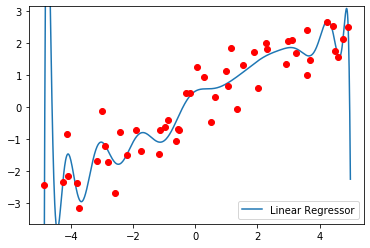

In [17]:
from sklearn.linear_model import LinearRegression

LNR_poly = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line,LNR_poly.predict(line_poly), label='Linear Regressor')
plt.xlim(np.min(X)-0.5,np.max(X)+0.5)
plt.ylim(np.min(y)-0.5,np.max(y)+0.5)
plt.plot(X,y,'o',c='r')
plt.legend(loc='lower right')
plt.show()

In [18]:
import pandas as pd
stock = pd.read_csv
